# Pràctica 9: Reinforment learning

#### NOM: Albert Suso Marco
#### NIU: 1456635

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, degut a la evaluació de dimecres tarda, es realitzarà abans de <span style="color:blue; font-size:20px">**dimecres 9 desembre a les 09:59**</span>, és a dir, quasibé tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, **sense ZIP**, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. [Multi-armed-bandits](#A.-Multi-Armed-Bandits) **(50%)**
* B. [OpenAI Gym](#OpenAI-Gym) **(50%)**


## Introducció

En aquesta pràctica serà diferent a les anteriors. Com que no teniu massa temps, hem decidit que no haureu d'implementar algorismes, sinò entendre els conceptes bàsics i explicar-los.

Per aquest motiu, farem ús de 2 entorns que ens ajudin a entendre com funciona un algorisme d'aprenentatge per reforç (Reinforcement Learning).


<img src="https://upload.wikimedia.org/wikipedia/commons/9/95/Markov_diagram_v1.svg" width="80%">



# A. Multi-Armed Bandits




## Multi-Armed Bandits and Reinforcement Learning

### A Gentle Introduction to the Classic Problem with Python Examples

Post extret de la següent web: https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da

![Photo by [Carl Raw](https://unsplash.com/@carltraw?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com?utm_source=medium&utm_medium=referral)](https://cdn-images-1.medium.com/max/10238/0*2orlZg7aPX5dhdBF)

Multi-armed bandit problems are some of **the simplest** reinforcement learning (RL) problems to solve. We have an agent which we allow to choose actions, and each action has a reward that is returned according to a given, underlying probability distribution. The game is played over many episodes (single actions in this case) and the goal is to maximize your reward.

**An easy picture is to think of choosing between *k*-many [*one-armed bandits*](https://en.wikipedia.org/wiki/Slot_machine) (i.e. slot machines) or one big slot machine with *k* arms. Each arm you pull has a different reward associated with it. You’re given 1,000 quarters, so you need to develop some kind of strategy to get the most bang for your buck.**

One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but, as stated before, each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the **explore-exploit dilemma**. Forms of this basic problem come up in areas outside of AI and RL, such as in [choosing a career](https://joshkaufman.net/explore-exploit/), [finance](https://www.aaai.org/ocs/index.php/IJCAI/IJCAI15/paper/viewFile/10972/10798), [human psychology](https://econ.arizona.edu/sites/econ/files/wilsonetal_jepgeneral2014_print.pdf), and even [medical ethics](http://www.pnas.org/content/106/52/22387) (although, I think my favorite proposed use case relates to the suggestion that, due to its richness, it be given to Nazi Germany during WWII, [“as the ultimate form of intellectual sabotage.”](https://people.eecs.berkeley.edu/~russell/classes/cs294/s11/readings/Gittins:1979.pdf)).



## TL;DR

We introduce multi-armed bandit problems following the framework of [Sutton and Barto’s book](https://amzn.to/2Q2mxxn) (affiliate link of the author of the post) and develop a framework for solving these problems as well as examples. 

We’ll focus on:
* [**ϵ−greedy**](#%CF%B5-Greedy-Methods)
* [**ϵ−decay**](#%CF%B5-Decay-Strategies)
* [**optimistic strategies**](#Optimistic-Initial-Value)



## Problem Setup

To get started, let’s describe the problem in a bit more technical detail. What we wish to do, is develop an estimate $Qt(a)$:

![](https://cdn-images-1.medium.com/max/2000/1*n6jigGk161weIu8xHYQT_A.png)

Where $Qt(a)$ is the estimated, expected reward ($Rn$), when action $An$ is taken at step $n$. 

We’re going to iteratively build a model that will converge towards the true value of each action. We’re going to use a Gaussian (normal) distribution for all of the underlying probability distributions that we’ll explore so that the mean corresponds to the true value (after all, given enough samples, we would expect our rewards to converge to the mean of the selected action).

The **simplest way to proceed** is to take the **greedy action** or take the action we think will maximize our reward at each time step. Another way of writing this is:

![](https://cdn-images-1.medium.com/max/2000/1*S3nJWVy8oQE0gTDnh2D0jw.png)

We can denote this maximum expectation or greedy action as $A^*n$. This is the *exploit* side of our aforementioned **explore-exploit dilemma**, and it makes lots of sense if the goal is to maximize our reward. Of course, doing this repeatedly only works well once we have a good sense of our expected rewards for each actions (unless we get rather lucky). So, we need to figure out an algorithm that explores enough of our search space so that we can exploit the best actions.

Before jumping into this, there’s one last concept to introduce. In typical RL applications, we may need hundreds of thousands of iterations, if not millions or more. It quickly becomes very computationally intensive to run simulations of these sorts and keep track of all that data just to calculate the average reward. To avoid this, we can use a handy formula so that all we need to track are two values: the mean and number of steps taken. If we need to calculate the mean at step $n$, $m_n$, we can do it with the previous mean, $m_{n−1}$ and $n$ as follows:

![](https://cdn-images-1.medium.com/max/2000/1*IGzEQ2Ze5N6ijgApE-Tynw.png)

With that, we can start to develop strategies for solving our *k-bandit* problems.



## ϵ-Greedy Methods

We briefly talked about a pure-greedy method, and I indicated that on its own it won’t work very well. Consider if you implement a pure-greedy method, you take one action, $A_n=a_1$, at $n=1$ and get a reward. Well, then this becomes your highest reward (assuming it is positive) and you simply repeat $a_1 ​∀ n$ (take action $a_1$ for all steps $n$). 

To encourage a bit of exploration, we can use ϵ-greedy which means that we explore another option with a probability of ϵ. This provides a bit of noise into the algorithm to ensure you keep trying other values, otherwise, you keep on exploiting your maximum reward.

Let’s turn to Python to implement our *k-*armed bandit.



## Building a greedy k-Armed Bandit

We’re going to define a class called `eps_bandit` to be able to run our experiment. This class takes number of arms, `k`, epsilon value `eps`, number of iterations `iter` as inputs. We'll also define a term `mu` that we can use to adjust the average rewards of each of the arms.


In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tqdm

%matplotlib inline

In [2]:
# global parameters
k = 10           # number of bandits
iters = 1000     # iters (steps or pulls) inside an episode
episodes = 500   # number of episodes

In [3]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, eps, iters, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

There are plenty of different ways to define this class. I did it so that once we initialize our problem, we just call the run() method and can examine the outputs. By default, the average rewards for each arm are drawn from a normal distribution around 0. Setting mu="sequence" will cause the rewards to range from 0 to *k-1* to make it easy to know which actions provide the best rewards when evaluating the results and which actions were taken. Finally, you could also set your own average rewards by passing values to mu.

Let’s set up some comparisons using different values of ϵ\epsilonϵ. For each of these, we’ll set k=10, run 1,000 steps for each episode and run 500 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.

100%|██████████| 500/500 [00:10<00:00, 46.32it/s]


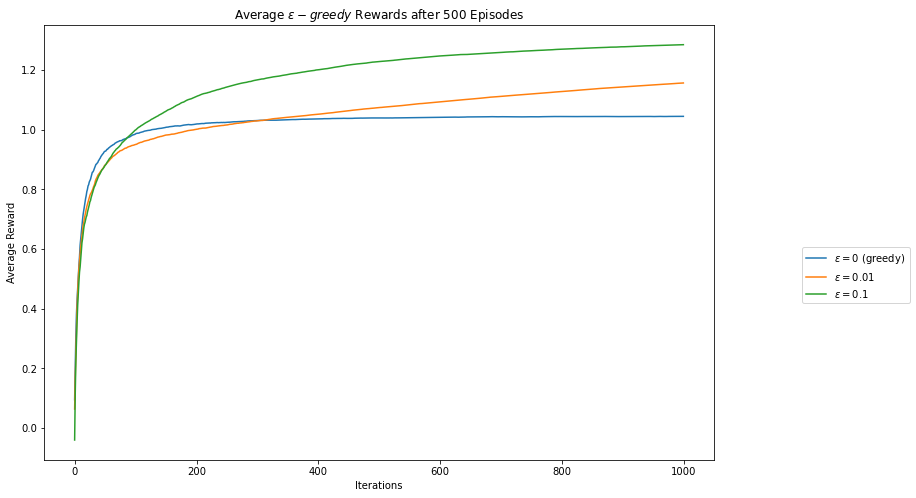

In [4]:
eps_000_rewards = np.zeros(iters)
eps_001_rewards = np.zeros(iters)
eps_010_rewards = np.zeros(iters)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_000 = eps_bandit(k, 0.00, iters)
    eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
    eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

    # Run experiments
    eps_000.run()
    eps_001.run()
    eps_010.run()

    # Update long-term averages
    eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
    eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
    eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_001_rewards, label="$\epsilon=0.01$")
plt.plot(eps_010_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes)  + " Episodes")
plt.show()

Looking at the results, the greedy function under performs the other two consistently, with ϵ=0.01 coming in between the two and ϵ=0.1 performing the best of the three here. Below, we can see the effect is clearer using the sequence argument, and can get a feel for how often the optimal action is taken per episode because the averages remain consistent across episodes.

100%|██████████| 500/500 [00:11<00:00, 44.76it/s]


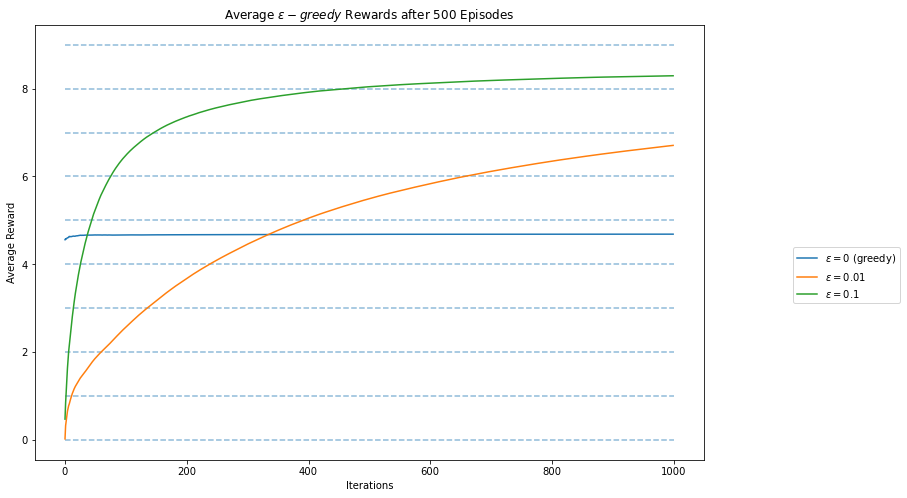

In [5]:
eps_0_rewards = np.zeros(iters)
eps_01_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_01_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_0 = eps_bandit(k, 0, iters, mu='sequence')
    eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

    # Run experiments
    eps_0.run()
    eps_01.run()
    eps_1.run()

    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
    eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
    eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (eps_1.k_n - eps_1_selection) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.5,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

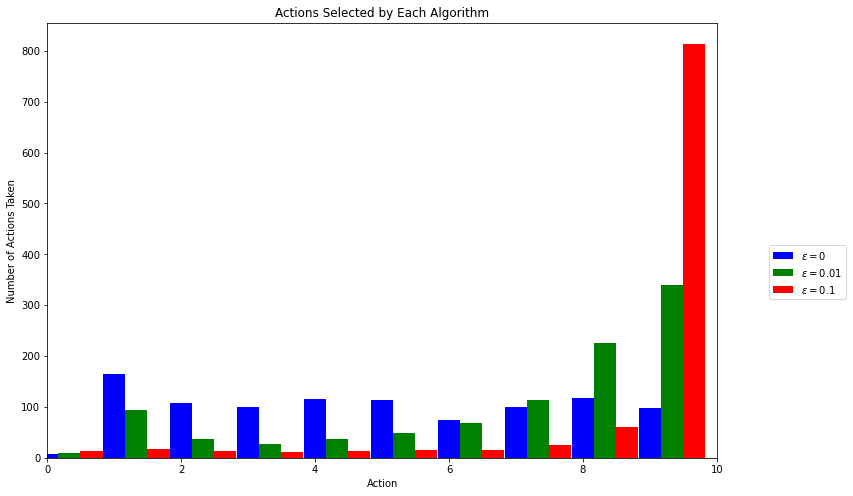

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
$\epsilon=0$,0.7252,16.5374,10.7382,9.9992,11.600,11.4000,7.4000,10.0000,11.8000,9.8000
$\epsilon=0.01$,0.9214,9.3326,3.7570,2.6732,3.736,4.8776,6.9178,11.2906,22.6082,33.8856
$\epsilon=0.1$,1.3732,1.6930,1.3130,1.2250,1.313,1.4716,1.5782,2.5004,6.1318,81.4008


In [6]:
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(12,8))
plt.bar(bins, eps_0_selection, width = 0.33, color='b', label="$\epsilon=0$")
plt.bar(bins+0.33, eps_01_selection, width=0.33, color='g', label="$\epsilon=0.01$")
plt.bar(bins+0.66, eps_1_selection, width=0.33, color='r', label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_01_selection, eps_1_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['$\epsilon=0$', '$\epsilon=0.01$', '$\epsilon=0.1$'],
                  columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

Viewing the average selection of the algorithms, we see why the larger ϵ value performs well, it takes the optimal selection 80% of the time.

Play around with the different values of both ϵ and *k* to see how these results change. For example, decreasing the search space would likely benefit smaller values of ϵ as exploration would be less beneficial and vice versa. Additionally, increasing the number of iterations will begin to benefit the lower value of ϵ because it will have less random noise.

## ϵ-Decay Strategies

The ϵ-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. It would be better for these to settle on an optimal solution and continue to exploit it. To this end, we can introduce ϵ-decay which reduces the probability of exploration with every step. This works by defining ϵ as a function of the number of steps, *n*.

![](https://cdn-images-1.medium.com/max/2000/1*OHcZPVCqG3dqIVFtpv7B-Q.png)

Where β<1 is introduced as a scaling factor to reduce the scaling rate so that the algorithm has sufficient opportunity to explore. In this case, we also include +1 in the denominator to prevent infinities from appearing. Given this, we can make a few small changes to our previous class of bandits to define an eps_decay_bandit class that works on the same principles.

In [7]:
class eps_decay_bandit:
    '''
    epsilon-decay k-bandit problem

    Inputs
    =====================================================
    k: number of arms (int)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from a normal distribution with mean = 0.
        Set to "sequence" for the means to be ordered from 0 to k-1.
        Pass a list or array of length = k for user-defined values.
    '''

    def __init__(self, k, iters, mu='random'):
        # Number of arms
        self.k = k
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)

        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)

    def pull(self):
        # Generate random number
        p = np.random.rand()
        if p < 1 / (1 + self.n / self.k):
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)

        reward = np.random.normal(self.mu[a], 1)

        # Update counts
        self.n += 1
        self.k_n[a] += 1

        # Update total
        self.mean_reward = self.mean_reward + (reward - self.mean_reward) / self.n

        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (reward - self.k_reward[a]) / self.k_n[a]

    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward

    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

Now running the code:

100%|██████████| 500/500 [00:07<00:00, 65.23it/s]


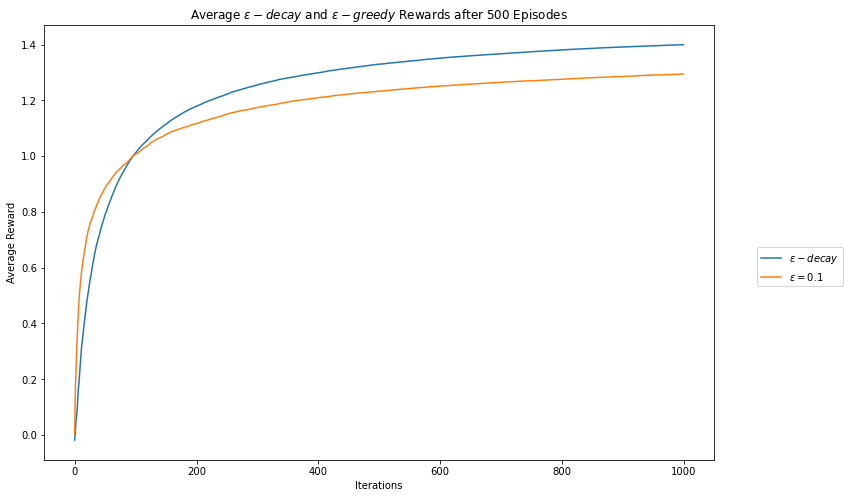

In [8]:
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters)
    eps_1 = eps_bandit(k, 0.1, iters, eps_decay.mu.copy())

    # Run experiments
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and " + "$\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()

The ϵ-decay strategy outperforms our previous best algorithm as it sticks to the optimal action once it is found.

There’s one last method to balance the explore-exploit dilemma in *k-bandit* problems, **optimistic initial values**.

## Optimistic Initial Value

This approach differs significantly from the previous examples we explored because it does not introduce random noise to find the best action, *A*_n*​. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

For this implementation, we don’t need a new class. Instead, we can simply use our eps_bandit class and set ϵ=0 and provide high, initial values for the estimates. Also, I like to initialize the pull count for each arm as 1 instead of 0 to encourage slightly slower convergence and ensure good exploration.

100%|██████████| 500/500 [00:11<00:00, 44.90it/s]


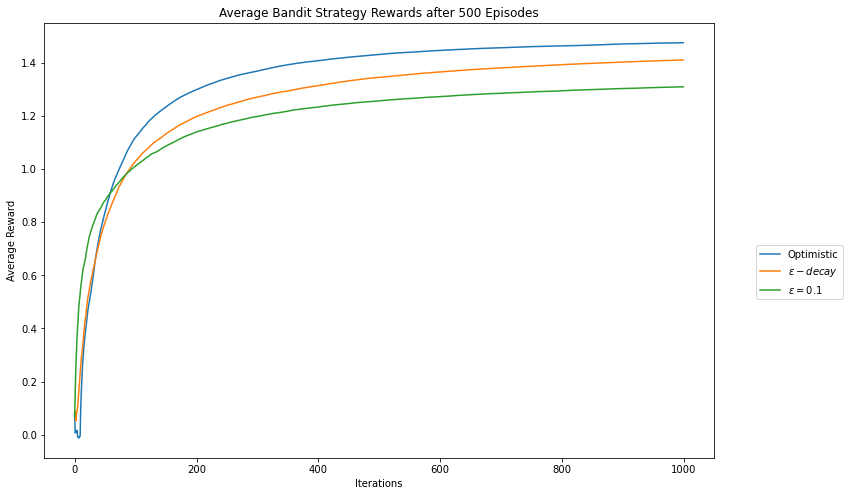

In [9]:
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Select initial values
oiv_init = np.repeat(5., k)

# Run experiments
for i in tqdm.tqdm(range(episodes)):
    # Initialize bandits
    oiv_bandit = eps_bandit(k, 0, iters)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters, oiv_bandit.mu.copy())
    eps_1 = eps_bandit(k, 0.1, iters, oiv_bandit.mu.copy())

    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()

    # Update long-term averages
    oiv_rewards = oiv_rewards + (oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

plt.figure(figsize=(12,8))
plt.plot(oiv_rewards, label="Optimistic")
plt.plot(eps_decay_rewards, label="$\epsilon-decay$")
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + str(episodes) + " Episodes")
plt.show()

We can see that, in this case, the optimistic initial value approach outperformed both our ϵ−greedy and the ϵ−decay algorithms. We can see too, the estimates the algorithm has for each of arms in the last episode.

In [10]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,5,0.78,1.35
1,2,-1.18,1.01
2,3,0.67,1.11
3,7,0.83,1.29
4,4,0.42,1.16
5,13,1.19,1.39
6,3,0.57,1.35
7,3,-0.93,1.00
8,959,1.42,1.44
9,1,-2.02,1.37


The estimates are far off the actual rewards in all cases except the one with more than 900 pulls. This highlights a lot of what we’ll be doing in reinforcement learning more generally. We don’t necessarily care about acquiring accurate representations of the environment we are interacting with. Instead, we intend to **learn optimal behavior** in those situations and seek to behave accordingly. This can open up a whole discussion about model-free versus model-based learning that we’ll have to postpone for another time.

There are [other bandit methods](https://www.datahubbs.com/multi-armed-bandits-reinforcement-learning-2/) that we will explore such as the gradient bandits, upper confidence bound (UCB) methods, and nonstationary problems. Plus, many others like [dueling bandits](http://www.sciencedirect.com/science/article/pii/S0022000012000281?via%3Dihub), [cluster bandits](https://arxiv.org/abs/1401.8257), [collaborative filtering bandits](https://arxiv.org/abs/1502.03473), [spatially correlated bandits](http://www.biorxiv.org/content/biorxiv/early/2017/04/28/106286.full.pdf), [distributed bandtis](https://arxiv.org/abs/1604.07706), [adversarial bandits](http://mercurio.srv.dsi.unimi.it/~cesabian/Pubblicazioni/J18.pdf), and [contextual bandits](http://proceedings.mlr.press/v32/agarwalb14.pdf) which are open to exploration. Starting to wonder if we haven’t been hit with [intellectual sabotage…](https://mlwave.com/multi-armed-bandits-algorithms-made-easy/)


#### Preguntes

**1.** Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus

**2.** Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

**3.** Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

**4.** Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

**5.** Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

**6.** Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

**7.** Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

**8.** Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

#### Respostes

# 1. Executa el ϵ-greedy `eps_bandit` amb els mateixos valors de eps (0, 0.01, 0.1) amb diferents valors de `episodes`. Desde 1 fins a 1000. Explica el comportament què hi veus.

Bàsicament s'observa que quant mes episodis, mes suaus son les corbes que descriuen els rewards. Això és degut a que les corbes es calculen fent la mitjana dels resultats obtinguts en els diferents episodis. Per tant, com mes episodis més es diluirà el "soroll" introduit pel fet que els rewards no son deterministes (sino que s'obtenen a paritr de distribucions de probabilitat normals amb variància>0).

100%|██████████| 1/1 [00:00<00:00, 39.62it/s]


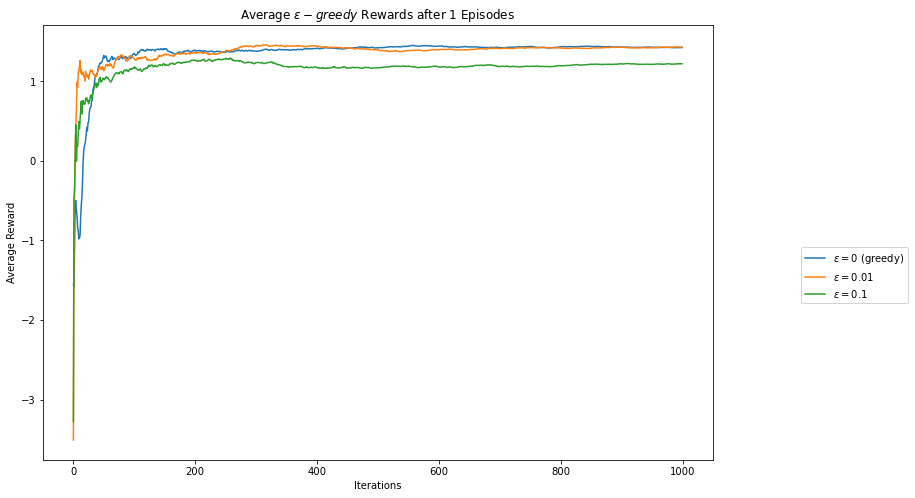

100%|██████████| 5/5 [00:00<00:00, 42.16it/s]


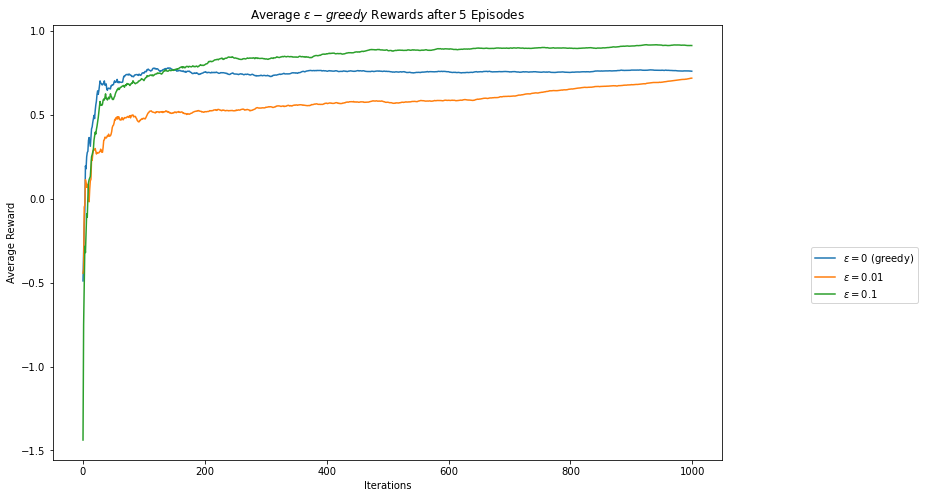

100%|██████████| 10/10 [00:00<00:00, 46.12it/s]


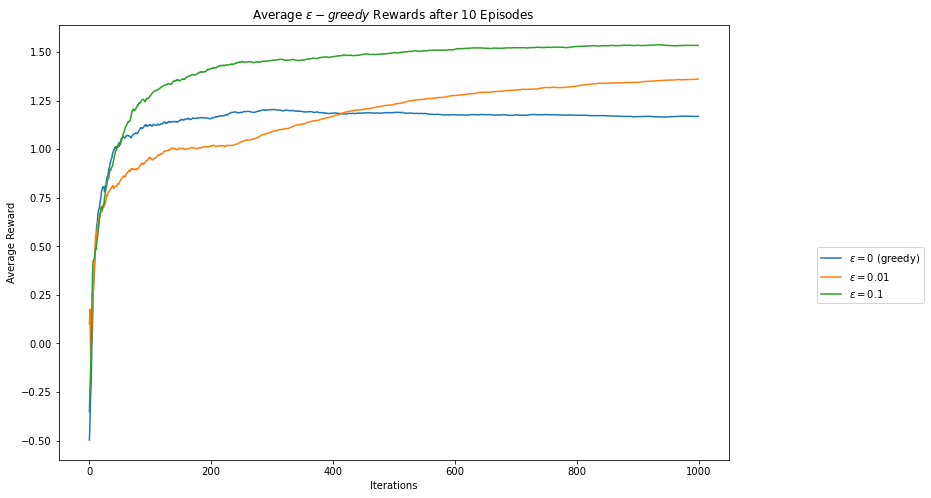

100%|██████████| 100/100 [00:02<00:00, 44.63it/s]


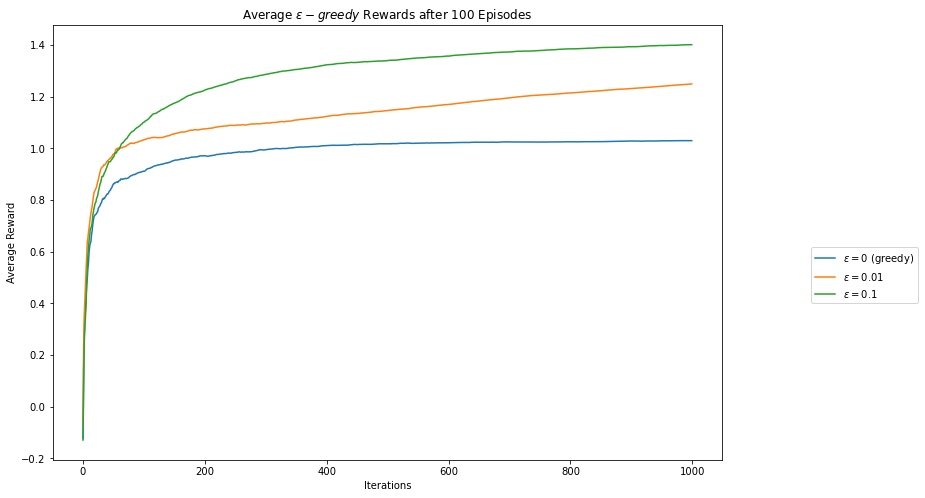

100%|██████████| 300/300 [00:06<00:00, 44.97it/s]


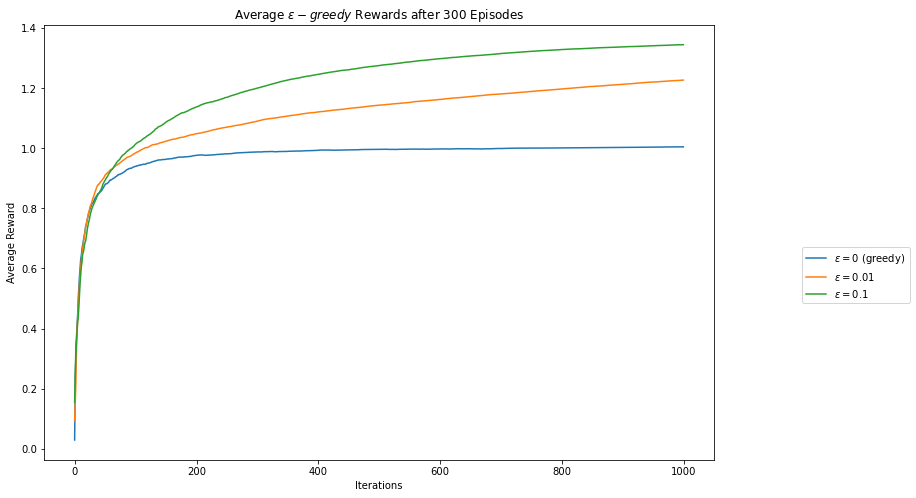

100%|██████████| 600/600 [00:13<00:00, 45.78it/s]


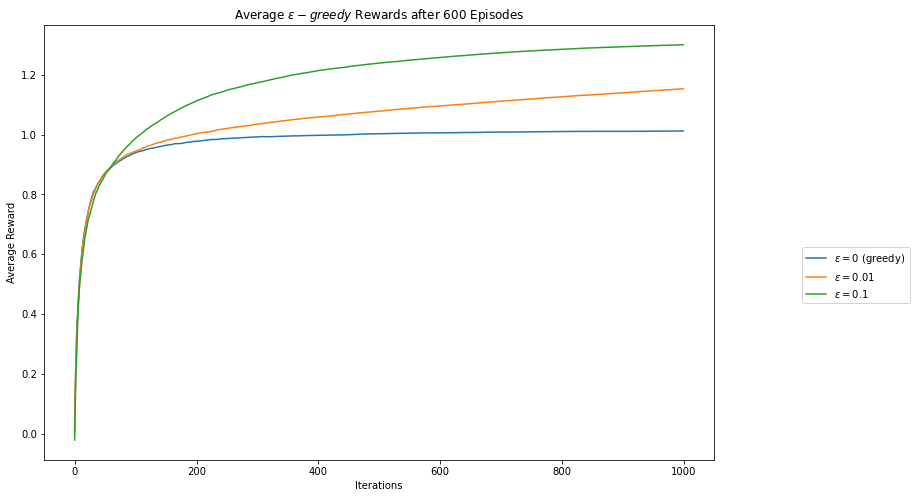

100%|██████████| 1000/1000 [00:21<00:00, 45.89it/s]


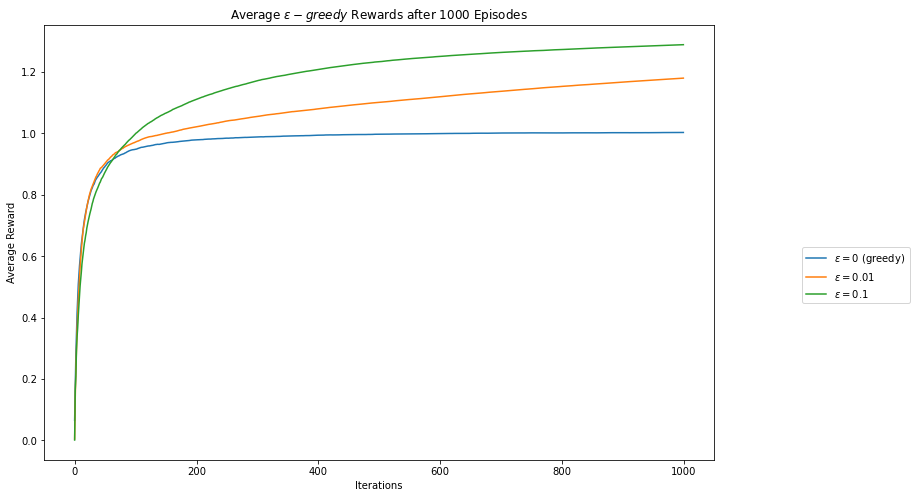

In [11]:
iters = 1000

for epis in [1, 5, 10, 100, 300, 600, 1000]:

    eps_000_rewards = np.zeros(iters)
    eps_001_rewards = np.zeros(iters)
    eps_010_rewards = np.zeros(iters)

    # Run experiments
    for i in tqdm.tqdm(range(epis)):
        # Initialize bandits
        eps_000 = eps_bandit(k, 0.00, iters)
        eps_001 = eps_bandit(k, 0.01, iters, eps_000.mu.copy())
        eps_010 = eps_bandit(k, 0.1, iters, eps_000.mu.copy())

        # Run experiments
        eps_000.run()
        eps_001.run()
        eps_010.run()

        # Update long-term averages
        eps_000_rewards = eps_000_rewards + (eps_000.reward - eps_000_rewards) / (i + 1)
        eps_001_rewards = eps_001_rewards + (eps_001.reward - eps_001_rewards) / (i + 1)
        eps_010_rewards = eps_010_rewards + (eps_010.reward - eps_010_rewards) / (i + 1)

    plt.figure(figsize=(12,8))
    plt.plot(eps_000_rewards, label="$\epsilon=0$ (greedy)")
    plt.plot(eps_001_rewards, label="$\epsilon=0.01$")
    plt.plot(eps_010_rewards, label="$\epsilon=0.1$")
    plt.legend(bbox_to_anchor=(1.3, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(epis)  + " Episodes")
    plt.show()

# 2. Què passa amb el número de iteracions dins d'un episodi? Mostra què passa en aquest cas per valors petits (<100) i per valors més grans (>500)

Com veiem a continuació...

Per a valors de $iters$ molt petits els millors resultats s'obtenen amb $\varepsilon=0$ ($iter=20$). Això pasa degut a que durant les primeres iteracions no tenim informació per a saber quines accions reporten millors rewards (tots están inicialment a mitja zero), i per tant en els casos $\varepsilon>0$ el mes probable es que es trii la acció amb major mitja, i com totes están inicialment a zero es triará la primera acció (degut al funcionament de np.argmax()), que justament es la que tendeix a donar els rewards mes baixos (degut al paràmetre mu='sequence'). 

Desprès d'això es necessiten unes quantes iteracions per a que es començin a probar accions aleatories i millorar els resultats. Al executar tant poques iteracions, no dona temps a superar els resultats obtinguts amb $\varepsilon=0$.

A mesura que augmentem les iteracions veiem que el model amb $\varepsilon=0.1$ supera al model determinista, degut a que gràcies a l'exploració troba accions amb millor reward que la acció del model determinista. Observem que amb molt poques iteracions (unes 40) el model amb $\varepsilon=0.1$ ja supera al determinista.

A mesura que van augmentant les iteracions, veiem que el model amb $\varepsilon=0.01$ va augmentant els seus rewards fins que aproximadament amb 400 iteracions supera al model determinista (aconsegueix trobar accions amb millor reward que l'acció del model determinista). Observem que ha trigat molt mes en aconseguir-ho que el model amb $\varepsilon=0.1$, degut a que el seu "ratio d'exploració" és molt mes petit i per tant li costa mes trobar noves accions.

A mesura que augmenten les iteracions, veiem com el reward mitjà del model amb $\varepsilon=0.1$ va augmentant cada vegada més lentament fins que s'estanca totalment (mes o menys al arribar a les 1500-2000 iteracions). El que està pasant aquí es que el model ja ha trobat la millor acció possible (que li reporta un reward mitjà de 9), però un 10% de les vegades realitza una acció aleatòria, cosa que fa que el reward mitjà final sigui menor que 9.

En canvi, veiem que el model amb $\varepsilon=0.01$ acaba superant al model amb $\varepsilon=0.1$, degut a que un cop troba la acció optima la executa casi sempre (en un 99% dels cops). Es esperable que si executessim el model per a moltes mes iteracions, el seu reward mitjà tendiría cap a 9.

En conclusió, el model determinista es dolent (i amb una altra inicialitzacó de les mitjanes de les distribucions de probabilitat ni tan sols te perquè guanyar les primeres iteracions), i el model amb $\varepsilon=0.01$ apren molt més lentament que el model amb $\varepsilon=0.1$, però acaba obtenint millors resultats (al cap de moltes iteracions).

100%|██████████| 500/500 [00:00<00:00, 1876.74it/s]


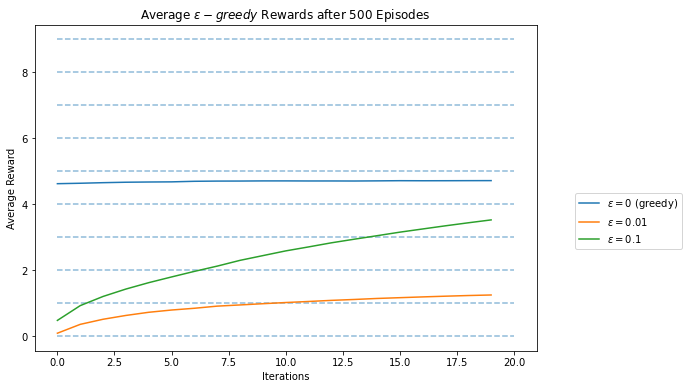

100%|██████████| 500/500 [00:00<00:00, 798.46it/s]


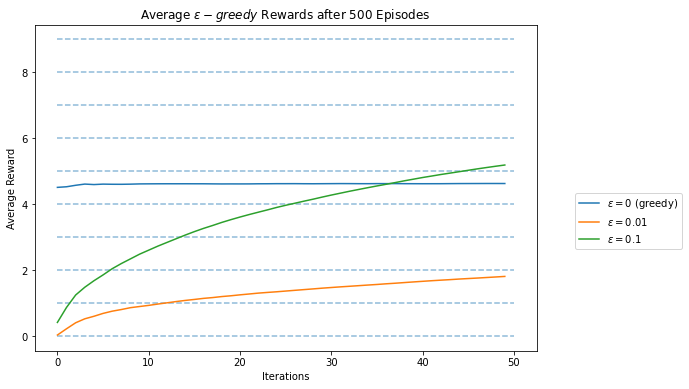

100%|██████████| 500/500 [00:01<00:00, 440.99it/s]


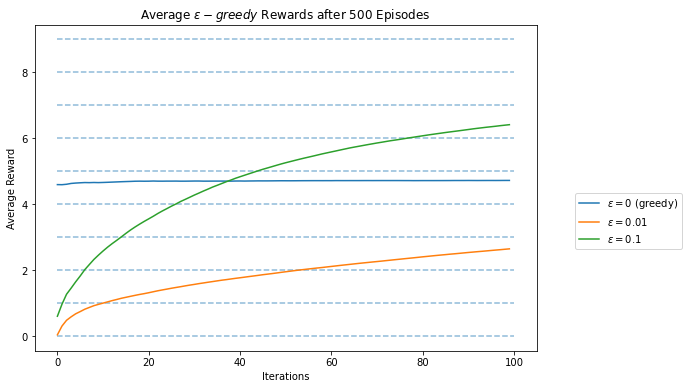

100%|██████████| 500/500 [00:03<00:00, 149.94it/s]


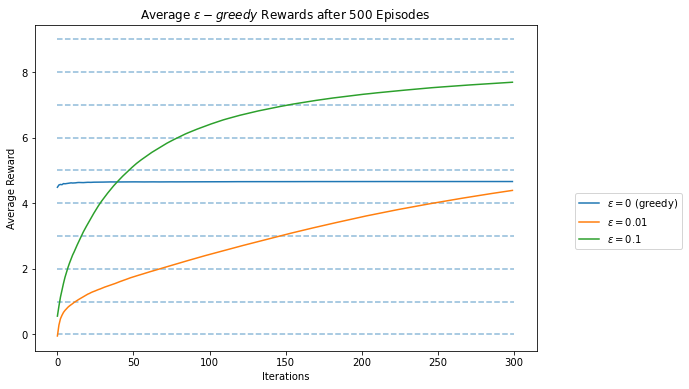

100%|██████████| 500/500 [00:06<00:00, 76.57it/s]


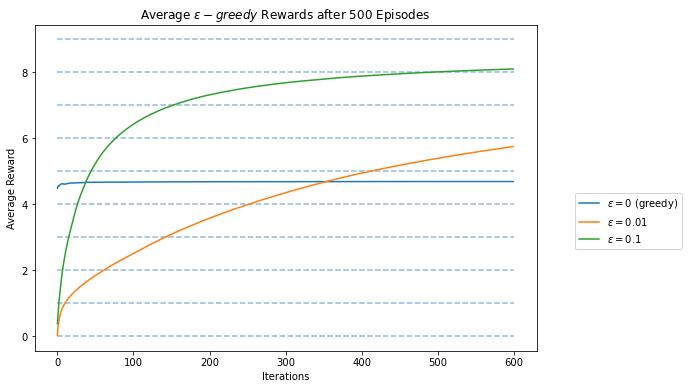

100%|██████████| 500/500 [00:10<00:00, 45.69it/s]


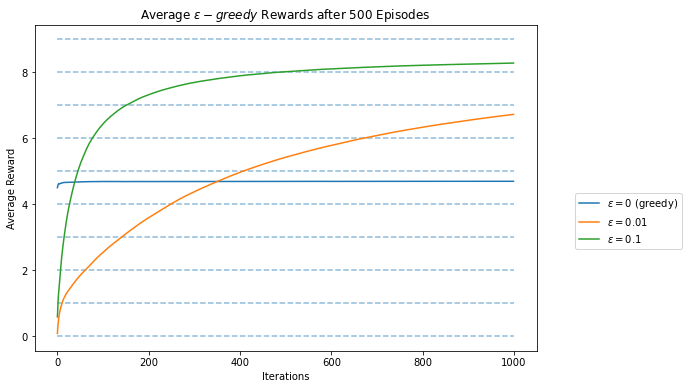

100%|██████████| 500/500 [00:56<00:00,  8.89it/s]


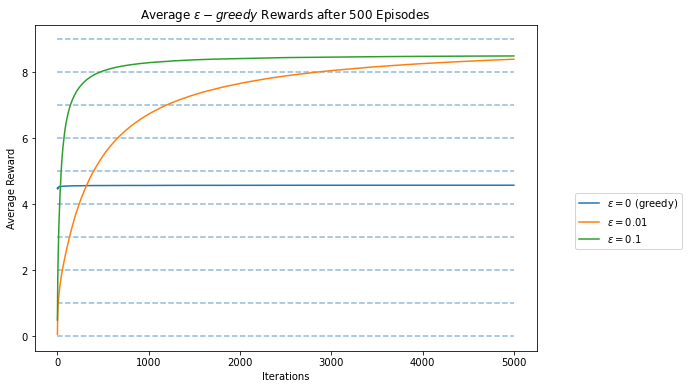

100%|██████████| 500/500 [01:47<00:00,  4.63it/s]


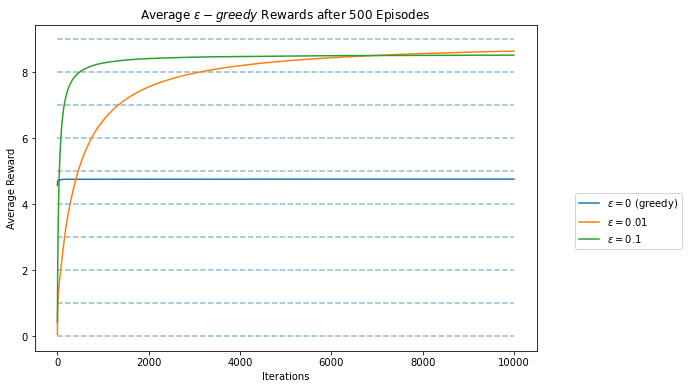

In [12]:
# Run experiments
for iters in [20, 50, 100, 300, 600, 1000, 5000, 10000]:
    eps_0_rewards = np.zeros(iters)
    eps_01_rewards = np.zeros(iters)
    eps_1_rewards = np.zeros(iters)
    eps_0_selection = np.zeros(k)
    eps_01_selection = np.zeros(k)
    eps_1_selection = np.zeros(k)
    for i in tqdm.tqdm(range(episodes)):
        # Initialize bandits
        eps_0 = eps_bandit(k, 0, iters, mu='sequence')
        eps_01 = eps_bandit(k, 0.01, iters, eps_0.mu.copy())
        eps_1 = eps_bandit(k, 0.1, iters, eps_0.mu.copy())

        # Run experiments
        eps_0.run()
        eps_01.run()
        eps_1.run()

        # Update long-term averages
        eps_0_rewards = eps_0_rewards + (eps_0.reward - eps_0_rewards) / (i + 1)
        eps_01_rewards = eps_01_rewards + (eps_01.reward - eps_01_rewards) / (i + 1)
        eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)

        # Average actions per episode
        eps_0_selection = eps_0_selection + (eps_0.k_n - eps_0_selection) / (i + 1)
        eps_01_selection = eps_01_selection + (eps_01.k_n - eps_01_selection) / (i + 1)
        eps_1_selection = eps_1_selection + (eps_1.k_n - eps_1_selection) / (i + 1)

    plt.figure(figsize=(9,6))
    plt.plot(eps_0_rewards, label="$\epsilon=0$ (greedy)")
    plt.plot(eps_01_rewards, label="$\epsilon=0.01$")
    plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
    for i in range(k):
        plt.hlines(eps_0.mu[i], xmin=0,
                  xmax=iters, alpha=0.5,
                  linestyle="--")
    plt.legend(bbox_to_anchor=(1.3, 0.5))
    plt.xlabel("Iterations")
    plt.ylabel("Average Reward")
    plt.title("Average $\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
    plt.show()

# 3. Com associes les diferents parts del `eps_bandit` amb un problema de Reinforcement Learning. Explica amb què relaciones la `POLICY`, `ENVIRONMENT`, `OBSERVATION`, `REWARD` i `ACTION`. 

La **POLICY** es correspondría amb les següents linies del mètode pull:

*p = np.random.rand()  
if self.eps == 0 and self.n == 0:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.random.choice(self.k)  
elif p < self.eps:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# Randomly select an action   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.random.choice(self.k)     
else:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# Take greedy action   
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.argmax(self.k_reward)*
    
que bàsicament fa que es trii una acció aleatòria amb probabilitat self.eps, i que es trii l'acció que maximiza el reward esperat (construit a partir de l'experiència) amb probabilitat 1-self.eps.

El **ENVIRONMENT** es abstracte i no té estat. Simplement ens permet realitzar k accions que aporten un cert reward.

El **REWARD** es correspondría amb la següent linea del mètode pull:

*reward = np.random.normal(self.mu[a], 1)*

que bàsicament otorga un reward seguint una distribució de probabilitat normal. La esperança d'aquesta distribució normal varía en funció de l'acció efectuada.

Finalment, les **ACTION**s, igual que el environment, son abstractes. Simplement hi han k accions possibles, però no sabem en que consisteixen i no modifiquen l'estat del environment (de fet, no té estat). Cada acció genera un reward seguint una distribució normal amb una certa mitja, com hem explicat. En el codi de eps_bandit, les $k$ accions es representen com els números $0,\ldots,k-1$, y son triades per la policy (en el codi que es veu a dalt, la acció sería la variable $a$).

# 4. Creus que la greedy action del `pull` esta ben implementada? És igual de just per tots els braços de la màquina? Heu observat alguna desviació en els random? Com ho faries més just?

No està ben implementada (casi, però no) degut a que, en cas de que en el array self.k_reward hi hagin diverses posicions empatades amb el valor màxim, la funció np.argmax(self.k_reward) retornarà l'index de la primera posició que assoleix aquest valor màxim.

Per tant, la policy està esbiaixada cap als primers braços de la màquina. 

Això, com hem comentat en la pregunta 2, provoca que (amb la inicialització mu='sequence'), el model amb $\varepsilon=0$ superi als models amb $\varepsilon>0$ en les primeres iteracions. Això sería un exemple de "desviació en els random".

La manera de fer-ho mes just és evident. En cas de que més d'un braç assoleixi la mitjana màxima, es s'escull aleatòriament entre els braços empatats.

# 5. Què significa un valor de `eps` de 0? I si li posem un 1? Què passarà?

Un **valor eps de zero** significa que no hi ha exploració, i per tant l'agent no té capacitat d'aprendre. L'agent realitzará sempre la acció amb major reward esperat. Això, junt amb el fet que inicialment els rewards esperats s'assignen aleatòriament a cada acció (o, en tot cas, no son els rewards esperats reals), provoca que l'agent executi sempre una mateixa acció (que molt probablement no es la millor, i ni tan sols te perquè ser bona).

Un **valor eps de 1** significa que tota acció és d'exploració, i que per tant l'agent tampoc té capacitat d'aprendre. En aquest cas, l'agent efectuará sempre una acció aleatòria, i per tant el seu aprenentatge sobre els rewards esperats de cada acció no li servirá de res. Encara que sàpiga amb alta confiança que una acció es la millor de totes, no l'aplicarà a menys que toqui aplicarla aleatòriament. En conseqüència, el reward mitjà que obtindrà l'agent será la mitjana dels rewards esperats de totes les accions possibles.

# 6. Què ha cambiat de codi entre `eps_bandit` i `eps_decay_bandit`?

Bàsicament, ha cambiat la probabilitat d'exploració.

En *eps_bandit*, la probabilitat d'exploració es mantenía constant al llarg de totes les iteracions. En canvi, en *eps_decay_bandit* aquesta probabilitat va decreixent a mesura que augmenten les iteracions.

Per tot el que hem comentat en l'exercici 2, es evident que la solució d'anar disminuint la probabilitat d'exploració al llarg de les iteracions funcionarà bé, ja que afavoreix una alta exploració en les primeres iteracions (cosa que permet trobar bones accions ràpidament) i desprès fa que, un cop trobades les bones accions, s'executin casi sempre.

En concret, les lines de codi que han canviat son:

En el **eps_bandit**:

p = np.random.rand()  
if self.eps == 0 and self.n == 0:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.random.choice(self.k)  
elif p < self.eps:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# Randomly select an action  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.random.choice(self.k)

En el **eps_decay_bandit**:

p = np.random.rand()  
if p < 1 / (1 + self.n / self.k):  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# Randomly select an action  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a = np.random.choice(self.k)

# 7. Quin valor de $\beta$ a han escollit al codi de `eps_decay_bandit`? Mostra la gràfica que ensenyi el valor de decay pels 1000 primers steps.

El valor escollit ha sigut $\beta=\frac{1}{k}$, on $k$ recordem que es el numero de possibles accions a efectuar (numero de braços).

Per a $k=10$, que es el valor amb que venim fent els experiments, la gràfica que mostra el valor del decay pels 1000 primers steps és la següent:

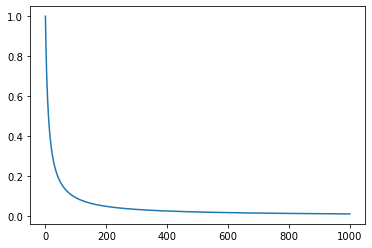

In [13]:
plt.plot([1/(1+i/10) for i in range(1000)])

# 8. Explica amb les teves paraules la gràfica de la comparativa entre `eps_bandit`, `eps_decay_bandit` i `optimistic`. Posa ènfasis en el comportament inicial dels 3 i en el comportament final després de 1.000 iteracions.

Com veiem, **en les primeres iteracions** la que aconsegueix al millor reward mitjà es el model *eps_bandit*, seguit per *eps_decay_bandit* i finalment *optimistic*.

Això és degut a que la probabilitat d'exploració de *eps_bandit* ($\varepsilon=0.1$) li permet trobar ràpidament una acció amb un reward *acceptablement bo* i pasa a executar aquesta acció el 90% de les vegades.

Per contra, la probabilitat d'exploració de *eps_decay_bandit* durant aquestes primers iteracions es molt major. Per tant, tot i que probablement troba accions amb millor reward, casi no les executa (ja que la majoría de vegades executa una acció aleatòria).

Finalment, durant les primeres iteracions, el model *optimistic* es limita a executar una rere l'altre les diferents accions possibles (es a dir, en les 10 primeres execucions executa les 10 accions possibles). Això ho fa degut a que el reward esperat inicial es major que el real en totes elles, i per tant al executar una el seu reward esperat baixarà. Com la tria de l'acció es determinista (es tria la que té major reward), la pròxima acció executada serà una de les que encara no s'ha executat (i per tant encara té reward esperat maximal). Això provoca que durant les primeres iteracions el reward mitjà sigui la mitja dels rewards esperat de totes les accions, i per tant es inferior al que obtenen els altres models (que executen mes les millors accions que han trobat.

**En les iteracions a mig termini**, veiem com el model *optimistic* ràpidament supera als altres dos models, i el model *eps_decay_bandit* supera al model *eps_bandit*.

Això és degut a que, el model *optimistic*, a mesura que va entrenant va fent tendir (de forma descendent) els rewards esperats cap als seus valors reals. Per la manera com ho fa (actualitzant les mitjanes), les accions amb reward esperat mes baix tendeixen mes ràpidament al seu valor real. A més, un cop el seu reward esperat cau per sota d'un cert threshold (al voltant del reward esperat real de la millor acció), aquestes accions ja mai es tornaràn a realitzar (ja que sempre hi haurà accions millors amb reward esperat millor). Es a dir, el model *optimistic* ràpidament descarta les pitjors accions i efectúa nomès les millors.

El model *eps_decay_bandit* acaba superant al model *eps_bandit* degut a que la seva major exploració inicial l'ha permès trobar accions millors, i arriba un moment en que la seva probabilitat d'exploració pasa a igualar o ser menor que la probabilitat d'exploració del model *eps_bandit*. Per tant, arriba un moment que la millor acció trobada pel model eps_decay_bandit* es millor que la trobada pel model eps_bandit*, i a més l'executa més freqüentment. Observem que el factor definitiu es la freqüència amb que s'executa la "millor acció trobada", ja que el moment en que es produeix el sorpasso coincideix amb el moment en que es produeix el "sorpasso de probabilitats".


**En les iteracions a llarg termini**, veiem que es manté la classificació abans obtinguda: el millor model es el *optimistic*, seguit del *eps_decay_bandit* i finalment el model *eps_bandit*.

Això és degut a que es de presumir que tots acabaràn troban l'acció óptima, però nomès el model *optimistic* l'executarà sempre. El model *eps_decay_bandit* l'executarà *casi* sempre, i el model *eps_bandit* el 90% de les vegades. Això si, a mesura que el numero d'iteracions tendeixi a infinit, el reward mitjà del model *eps_decay_bandit* tendirà cap al reward mitjà del model *optimistic*, ja que la seva probabilitat d'exploració tendirà a zero.

# OpenAI Gym

[OpenAI Gym](https://gym.openai.com/) is a toolkit for developing and comparing reinforcement learning algorithms. It makes no assumptions about the structure of your agent, and is compatible with any numerical computation library, such as TensorFlow or Pytorch or even with NumPy.

The gym library is a collection of test problems —[environments](https://gym.openai.com/envs/#classic_control)— that you can use to work out your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

Podeu instal·lar-ho desde pip:

 `pip install gym`

You'll be able to run a few environments right away:

* algorithmic
* toy_text
* classic_control (you'll need `pyglet` to render though)

We recommend playing with those environments at first, and then later installing the dependencies for the remaining environments.







## Environments

Here’s a bare minimum example of getting something running. This will run an instance of the CartPole-v0 environment for 1000 timesteps, rendering the environment at each step. You should see a window pop up rendering the classic cart-pole problem:


In [14]:
import gym
import tqdm

env = gym.make('CartPole-v0')
env.reset()
for _ in tqdm.tqdm(range(200)):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

 14%|█▎        | 27/200 [00:00<00:15, 11.30it/s]/home/albert/miniconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
100%|██████████| 200/200 [00:03<00:00, 54.83it/s]


Normally, we’ll end the simulation before the cart-pole is allowed to go off-screen. More on that later. For now, please ignore the warning about calling step() even though this environment has already returned `done` = True.



## Observations
If we ever want to do better than take random actions at each step, it’d probably be good to actually know what our actions are doing to the environment.

The environment’s `step` function returns exactly what we need. In fact, `step` returns four values. These are:

* `observation` (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
* `reward` (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
* `done` (boolean): whether it’s time to `reset` the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
* `info` (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an `action`, and the environment returns an `observation` and a `reward`.

<img src="https://www.mathworks.com/help/reinforcement-learning/ug/agent_diagram.png" width="50%">



The process gets started by calling `reset()`, which returns an initial `observation`. So a more proper way of writing the previous code would be to respect the `done` flag:


In [15]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(2):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 3.15261958e-02 -8.53569380e-05  1.51553845e-02 -2.92199310e-02]
[ 0.03152449  0.19481601  0.01457099 -0.3170829 ]
[ 0.03542081  0.38972743  0.00822933 -0.60513527]
[ 0.04321536  0.58473334 -0.00387338 -0.89521483]
[ 0.05491002  0.38966412 -0.02177767 -0.60375197]
[ 0.06270331  0.19485341 -0.03385271 -0.31800733]
[ 0.06660037  0.39044075 -0.04021286 -0.62117105]
[ 0.07440919  0.58610052 -0.05263628 -0.92624283]
[ 0.0861312   0.78189227 -0.07116114 -1.23499163]
[ 0.10176905  0.58775345 -0.09586097 -0.96542413]
[ 0.11352411  0.39404069 -0.11516945 -0.70432902]
[ 0.12140493  0.20068709 -0.12925603 -0.45000498]
[ 0.12541867  0.00760753 -0.13825613 -0.20069719]
[ 0.12557082  0.20440819 -0.14227008 -0.53359925]
[ 0.12965898  0.40121418 -0.15294206 -0.86751208]
[ 0.13768327  0.20846707 -0.1702923  -0.62655616]
[ 0.14185261  0.01607981 -0.18282343 -0.39197382]
[ 0.14217421 -0.17604082 -0.1906629  -0.16204678]
[ 0.13865339 -0.3679946  -0.19390384  0.06495037]
[ 0.1312935  -0.17069778 -0.192604

## Spaces

In the examples above, we’ve been sampling random actions from the environment’s action space. But what actually are those actions? Every environment comes with an `action_space` and an `observation_space`. These attributes are of type `Space`, and they describe the format of valid actions and observations:

In [16]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

Discrete(2)
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The `Discrete` space allows a fixed range of non-negative numbers, so in this case valid `actions` are either 0 or 1. The `Box` space represents an n-dimensional box, so valid `observations` will be an array of 4 numbers. We can also check the `Box`’s bounds:

In [17]:
print(list(env.observation_space.high))
print(list(env.observation_space.low))

[4.8, 3.4028235e+38, 0.41887903, 3.4028235e+38]
[-4.8, -3.4028235e+38, -0.41887903, -3.4028235e+38]


This introspection can be helpful to write generic code that works for many different environments. `Box` and `Discrete` are the most common `Spaces`. You can sample from a Space or check that something belongs to it:



In [18]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8


For `CartPole-v0` one of the actions applies force to the left, and one of them applies force to the right. (Can you figure out which is which?)

Fortunately, the better your learning algorithm, the less you’ll have to try to interpret these numbers yourself.



<img src="http://bytepawn.com/images/classic_control.png">

<table>
    <tbody>
    <tr>
        <th><b>env</b></th>
        <th><b>CartPole-v1</b></th>
        <th><b>Acrobot-v1</b></th>
        <th><b>Pendulum-v0</b></th>
        <th><b>MountainCar-v0</b></th>
        <th><b>MountainCarContinuous-v0</b></th>
    </tr>
    <tr>
        <td><b>description</b></td>
        <td>balance a pole on a cart</td>
        <td>swing up a two-link robot</td>
        <td>swing up a pendulum</td>
        <td>drive up a big hill</td>
        <td>drive up a big hill</td>
    </tr>
    <tr>
        <td><b>code</b></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py">cartpole.py</a></td>
        <td><a nref="https://github.com/openai/gym/blob/master/gym/envs/classic_control/acrobot.py">acrobot.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/pendulum.py">pendulum.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py">mountain_car.py</a></td>
        <td><a href="https://github.com/openai/gym/blob/master/gym/envs/classic_control/continuous_mountain_car.py">continuous_mountain_car.py</a></td>
    </tr>
    <tr>
        <td><b>state</b></td>
        <td>4 reals: cart position, velocity, pole angle, pole velocity</td>
        <td>6 reals: sine and cosine of the two rotational joint angles and the joint angular velocities</td>
        <td>3 reals: sine and cosine of the angle and angular velocity</td>
        <td>2 reals: position, velocity</td>
        <td>2 reals: position, velocity</td>
    </tr>
    <tr>
        <td><b>action</b></td>
        <td>discrete: left/right</td>
        <td>discrete: left/nothing/right, the torque on the second joint</td>
        <td>1 real between -2 and 2, the torque</td>
        <td>discrete: left/nothing/right, the force on the car</td>
        <td>1 real between -1 and 1, the force on the car</td>
    </tr>
    <tr>
        <td><b>episode length</b></td>
        <td>500</td>
        <td>500</td>
        <td>200</td>
        <td>200</td>
        <td>999</td>
    </tr>
    <tr>
        <td><b>reward</b></td>
        <td>+1 for each timestep the agent stays alive</td>
        <td>-1 for each timestep the agent takes to swing up</td>
        <td>negative reward as a function of the angle</td>
        <td>-1 for each timestep the agent doesn’t reach the top of the hill</td>
        <td>negative for applied action, +100 once solved</td>
    </tr>
    <tr>
        <td><b>reward threshold for solved</b></td>
        <td>475</td>
        <td>-100</td>
        <td>None (I used -150)</td>
        <td>-110</td>
        <td>90</td>
    </tr>
</tbody></table>

**CartPole-v1 is considered "solved" when the agent obtains an average reward of at least 475.0 over 100 consecutive episodes**

## MonteCarlo Implementation for CartPole

  2%|▏         | 49/2000 [00:00<07:59,  4.07it/s, last_100_avg_pole_upright=77.5, len(history)=90]

{'Episode 0. Iteration with pole upright: 16.0. History length: 5'}


 22%|██▏       | 439/2000 [00:04<00:48, 32.51it/s, last_100_avg_pole_upright=163, len(history)=184] 

{'Episode 400. Iteration with pole upright: 200.0. History length: 177'}


 41%|████▏     | 825/2000 [00:09<00:50, 23.46it/s, last_100_avg_pole_upright=196, len(history)=198] 

{'Episode 800. Iteration with pole upright: 200.0. History length: 198'}


 61%|██████▏   | 1227/2000 [00:14<00:26, 28.85it/s, last_100_avg_pole_upright=200, len(history)=198] 

{'Episode 1200. Iteration with pole upright: 200.0. History length: 198'}


 82%|████████▏ | 1631/2000 [00:19<00:12, 30.15it/s, last_100_avg_pole_upright=200, len(history)=198] 

{'Episode 1600. Iteration with pole upright: 200.0. History length: 198'}


100%|██████████| 2000/2000 [00:21<00:00, 93.11it/s, last_100_avg_pole_upright=200, len(history)=198] 


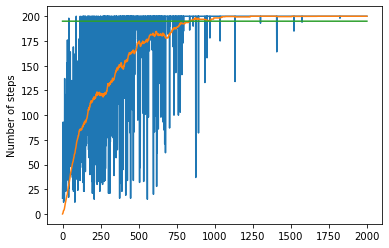

In [19]:
import gym
from random import randint
import math
import tqdm
import numpy as np
import matplotlib.pyplot as plt

def learn(episodeCount, episodeVerbose=100):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))
        
        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose)
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(rewardHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay)  # Get the action
        
        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(action)  # Apply the action
        
        totalRewards += reward  # Update total reward for this episode
        
        if done:  # Episode is over
            rewardHistory[i_episode] = totalRewards
            for i, state_action in enumerate(episodeStatesActions):  # Update value for chosen actions
                updatePolicyMC(state_action['state'], 
                               state_action['action'], 
                               totalRewards-i)
            break

    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, 
                                                                                        totalRewards, 
                                                                                        len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    a = history[state][action]
    a['value'] = (a['value'] * a['count'] + G) / (a['count'] + 1)
    a['count'] += 1


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o))
    return state

    
# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if state not in history:  # If state does not exists, create it
        history[state] = []
        for _ in range(env.action_space.n):
            history[state].append({'count':0, 'value':0})
    stateValues = history[state]
    for action in range(env.action_space.n):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction


env = gym.make('CartPole-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

#### Preguntes

**1.** Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

**2.** Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

**3.** Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

**4.** Explica la funció `action = policy(state, decay)`. 

**5.** Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.

**6.** Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?

**7.** Explica la darrere gràfica retornada. Què s'hi representa?

**8.** Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.



#### Respostes

# 1. Explica què és el `episodeCount` i el `env.spec.max_episode_steps`.

La variable *episodeCount* conté un enter especificant el número de "partides" que l'agent "jugarà" per tal d'obtenir informació que li permeti actualitzar la policy. Cada episodi sería l'equivalent a una partida del joc pel qual s'està entrenant l'agent.

La variable *env.spec.max_episode_steps* conté un enter especificant el número màxim d'accions que l'agent pot efectuar al llarg d'un episodi. Es a dir, l'episodi s'acabarà, com a molt tard, un cop l'agent hagi fet *env.spec.max_episode_steps* accions.

# 2. Com són les observacions de l'entorn? En quin estat s'inicialitza l'environment?

Les observacions del entorn son 4-tuples, els components de les cuals son:
* Cart position: float entre -4.8 i 4.8
* Cart Velocity: float entre -Inf i Inf
* Pole Angle: float entre -0.418 i 0.418
* Pole Angular Velocity: float entre -Inf i Inf

Es a dir, cada observació et diu la posició de la carreta, la seva velocitat, l'angle que forma el pal i la seva velocitat angular.

No està de mes comentar que l'algoritme d'entrenament que ens has adjuntat discretitza els valors de les 4-tuples aplicant-lis la funció math.floor().

A continuació podem veure un estat inicial del environment, tot i que hem de dir que en cada inicialització l'estat inicial és diferent.

In [20]:
env = gym.make('CartPole-v0')
print(env.reset())

[-0.03638693 -0.00922889 -0.0390246  -0.02041202]


# 3. Explica el `decay` utilitzat. Mostra la gràfica del decay utilitzat per totes les epoques.

El decay utilitzat es calcula mitjançant la següent formula:

*decayX = 0.02  
decayY = 20  
decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))*

Bàsicament, aquesta fòrmula fa que el decay vagi disminuint linealment en els primers 1000 episodis (ja que $20-0.02x>\frac{10}{x+1}$ per a tot $0\le x<999.5$) i a partir d'aleshores disminueixi seguint la fòrmula $decay=\frac{10}{i_{episode}+1}$.

El decay determina la probabilitat de realitzar una acció exploratoria o no. En concret, es genera un enter aleatori entre 0 i 99, i si cau per sota del valor del decay aleshores es realitza una acció exploratoria (s'executa l'acció menys utilitzada) i en cas contrari s'executa la acció amb el millor reward esperat.

A continuació mostrem la gràfica del decay per a 2000 episodis:

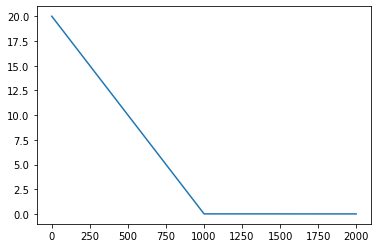

In [21]:
decayX = 0.02
decayY = 20
plt.plot([max(-i_episode*decayX+decayY, 10/(i_episode+1)) for i_episode in range(2000)])

# 4. Explica la funció `action = policy(state, decay)`. 

Aquesta funció rep com a paràmetres un estat del environment i un cert decay. 

Aleshores, si l'estat és nou (i.e. mai s'havia assolit al llarg del entrenament) el guarda en un diccionari **history** i li posa com a valor un array de $k$ diccionaris (on $k$ es el numero d'accions possibles) {'count':0, 'value':0} que guardarán cuantes vegades s'ha realitzat l'acció i-èssima en aquest estat, i el reward mitjà obtingut a conseqüència de realitzar aquesta acció en aquest estat.

A continuació agafa l'historial d'aquest estat del diccionari **history** i troba l'acció que en aquest estat s'ha utilitzat menys vegadas i l'acció que en aquest estat ha reportat un major reward mitjà.

Finalment, sampleja un numero al atzar entre 0 i 99, i si aquest numero cau per sota del decay retorna l'acció menys utilitzada, mentre que si cay per sobre retorna l'acció amb millor reward mitjà.

In [22]:
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = env.action_space.sample()
    minCountAction = env.action_space.sample()
    if state not in history:  # If state does not exists, create it
        history[state] = []
        for _ in range(env.action_space.n):
            history[state].append({'count':0, 'value':0})
    stateValues = history[state]
    for action in range(env.action_space.n):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction

# 5. Què passa en el `obs, reward, done, _ = env.step(action)`. Explica les variables retornades.

El mètode *env.step(action)* aplica la acció *action* sobre el environment *env* i retorna 4 variables.

De les 4 variables que retorna nomès explicarem 3, que son les que s'utilitzen en el codi (tot i que estàn les 4 explicades en la introducció teòrica que ens has deixat):
* obs: La observació del estat del environment desprès d'efectuar l'acció.
* reward: El reward obtingut com a resultat d'efectuar l'acció.
* done: un flag boolea que indica si el episodi s'ha acabat (i cal resetejar el environment) o no.

# 6. Com es premien els rewards en l'actualització de la policy `updatePolicyMC`? Què es guarda al diccionari `history`?

El diccionari history té els diferents states assolits al llarg del entrenament com a claus, i cada valor és un array de $k$ diccionaris de la forma {'count':n, 'value':x} (on $k$ es el numero d'accions possibles). Així, 

*history[state][action][count]* guarda cuantes vegades s'ha realitzat l'acció *action* estant en l'estat *state*

*history[state][action][value]* guarda el reward mitjà resultant de realitzar l'acció *action* estant en l'estat *state*

Si en el estat *state* la acció *action* ha fet que s'aguantesin *G* steps més (i.e. obtinguessium un reward de $G$ a partir de realitzar la acció), aleshores al actualitzar la policy fent *updatePolicyMC(state, action, G)* s'actualitza l'entrada *history[state][action]* sumant 1 al valor de la clau *count* i actualitzant la mitja de rewards associada a la clau *value* afegint el reward $G$ (amb l'operació history[state][action]['value'] = (history[state][action]['value'] * history[state][action]['count'] + G) / (history[state][action]['count'] + 1)).

# 7. Explica la darrere gràfica retornada. Què s'hi representa?

La figura presenta tres gràfiques diferents:

* Color taronja: mostra el reward obtingut en cada episodi.
* Color verd: mostra el threshold a partir del qual el episodi es considera superat. Es a dir, si s'aguanten igual o mes steps que aquest threshold aleshores t'has "pasat el joc".
* Color blau: mostra el resultat de convolucionar els rewards obtinguts en cada episodi amb una mariu de uns.

Com veiem, el nostre agent ha après prou bé, doncs a partir del episodi 750 aprox pasa superar tots els episodis.

# 8. Explica la relació entre la mida del `history`, i el que s'obté de la funció `getState(obs)`. Fés proves reduint o augmentant la dimensionalitat i el número de possibles estats del sistema per veure com afecta al aprenentatge.

La funció getState(obs) discretitza el estat *obs*. En concret, pren cada element de la 4-tupla que determina l'estat del environment i el trunca aplicant-li la funció math.floor(). Posteriorment concatena en un string els 4 elements truncats, i el string generat serà el que posteriorment s'utilitzarà com a identificador del estat.

El diccionari *history* conté una entrada per cada estat assolit al llarg del entrenament, on per estat s'enten aquesta concatenació de strings que acabem de descriure. Per tant, gràcies a la funció getState(obs) es redueix enormement el nombre possible d'estats, i per tant també la mida del diccionari *history*

A continuació mostrem dues proves, una reduïnt la dimensionalitat i una altra augmentantla.

A continuació veiem una prova reduïnt la dimensionalitat:

  4%|▍         | 80/2000 [00:00<07:43,  4.15it/s, last_100_avg_pole_upright=33.3, len(history)=7]

{'Episode 0. Iteration with pole upright: 13.0. History length: 1'}


 26%|██▋       | 529/2000 [00:01<00:46, 31.33it/s, last_100_avg_pole_upright=39.2, len(history)=7]

{'Episode 400. Iteration with pole upright: 45.0. History length: 7'}


 45%|████▌     | 908/2000 [00:03<00:09, 115.50it/s, last_100_avg_pole_upright=39.7, len(history)=7]

{'Episode 800. Iteration with pole upright: 45.0. History length: 7'}


 64%|██████▍   | 1276/2000 [00:04<00:02, 241.92it/s, last_100_avg_pole_upright=41.6, len(history)=7]

{'Episode 1200. Iteration with pole upright: 32.0. History length: 7'}


 85%|████████▌ | 1702/2000 [00:05<00:01, 258.66it/s, last_100_avg_pole_upright=41, len(history)=7]  

{'Episode 1600. Iteration with pole upright: 43.0. History length: 7'}


100%|██████████| 2000/2000 [00:05<00:00, 350.77it/s, last_100_avg_pole_upright=41.7, len(history)=7]


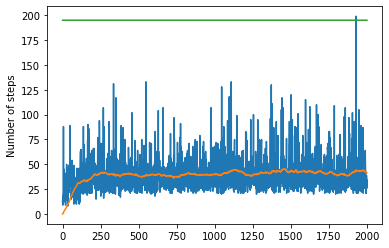

In [23]:
def getState(obs):
    state = ''
    for o in obs[:2]:
        state += str(math.floor(o))
    return state

env = gym.make('CartPole-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

Com podem veure els resultats han sigut desastrosos, i aquesta vegada l'agent no ha aconseguir superar el threshold d'èxit en cap moment. Això era d'esperar, ja que l'hem privat de informació fonamental (l'angle del pal i la seva velocitat angular).

A continuació veiem que, si el privem de la informació corresponent a la posició i velocitat del carro, però li donem l'angle del pal i la seva velocitat angular aleshores si que aconsegueix bons resultats.

  2%|▏         | 42/2000 [00:00<10:27,  3.12it/s, last_100_avg_pole_upright=90.3, len(history)=10]

{'Episode 0. Iteration with pole upright: 21.0. History length: 3'}


 22%|██▏       | 430/2000 [00:05<01:03, 24.65it/s, last_100_avg_pole_upright=154, len(history)=11] 

{'Episode 400. Iteration with pole upright: 200.0. History length: 11'}


 42%|████▏     | 845/2000 [00:09<00:34, 33.44it/s, last_100_avg_pole_upright=194, len(history)=11] 

{'Episode 800. Iteration with pole upright: 200.0. History length: 11'}


 62%|██████▏   | 1230/2000 [00:14<00:24, 31.02it/s, last_100_avg_pole_upright=200, len(history)=11] 

{'Episode 1200. Iteration with pole upright: 200.0. History length: 11'}


 82%|████████▏ | 1640/2000 [00:19<00:11, 30.07it/s, last_100_avg_pole_upright=200, len(history)=11] 

{'Episode 1600. Iteration with pole upright: 200.0. History length: 11'}


100%|██████████| 2000/2000 [00:21<00:00, 93.38it/s, last_100_avg_pole_upright=200, len(history)=11] 


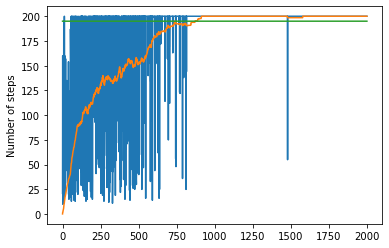

In [24]:
def getState(obs):
    state = ''
    for o in obs[2:]:
        state += str(math.floor(o))
    return state

env = gym.make('CartPole-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

Finalment, fem una prova augmentant la mida del espai d'estats. En concret, en comptes de truncar els valors de les 4-tuples que defineixen els estats, el que farem es arrodonirlos a un decimal.

Com veiem a continuació, tot i que els resultats son millors que els obtinguts amb la primera reducció de dimensionalitat, no aconseguim superar el "threshold d'éxit". Això ens ha de portar a pensar que una dimensionalitat excessiva complica l'aprenentatge, i per tant l'ideal és escollir la representació del environment mes petita possible que aporti la informació rellevant per al problema.

  3%|▎         | 60/2000 [00:00<07:55,  4.08it/s, last_100_avg_pole_upright=31, len(history)=1112]  

{'Episode 0. Iteration with pole upright: 13.0. History length: 12'}


 23%|██▎       | 457/2000 [00:03<00:34, 45.02it/s, last_100_avg_pole_upright=54.7, len(history)=3830]

{'Episode 400. Iteration with pole upright: 117.0. History length: 3464'}


 41%|████▏     | 826/2000 [00:08<00:48, 24.28it/s, last_100_avg_pole_upright=102, len(history)=6155]  

{'Episode 800. Iteration with pole upright: 200.0. History length: 5960'}


 61%|██████▏   | 1227/2000 [00:13<00:30, 24.96it/s, last_100_avg_pole_upright=126, len(history)=7711] 

{'Episode 1200. Iteration with pole upright: 200.0. History length: 7605'}


 82%|████████▏ | 1634/2000 [00:17<00:09, 40.59it/s, last_100_avg_pole_upright=129, len(history)=8988] 

{'Episode 1600. Iteration with pole upright: 103.0. History length: 8917'}


100%|██████████| 2000/2000 [00:19<00:00, 103.95it/s, last_100_avg_pole_upright=129, len(history)=9947]


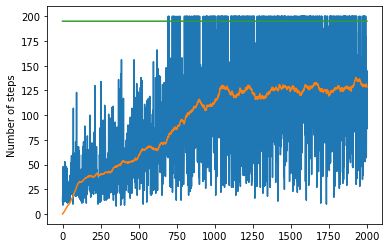

In [25]:
def getState(obs):
    state = ''
    for o in obs:
        state += str(round(o, 1))
    return state

env = gym.make('CartPole-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

# Extra. Learn on the other 4 environments (+2pts)

Aquest apartat és opcional, i només servirà per fer pujar la nota 2 punts (fins al 12 i llavors fer promig amb la resta de pràctiques)

L'objectiu dels mètodes de aprenentatge per reforç és que siguin prou robustos com per poder aprendre diferents tasques diferents. Per això, modifiqueu el codi necessari per aconseguir que els 5 environments funcionin:
* CartPole-v1
* Acrobot-v1
* Pendulum-v0
* MountainCar-v0
* MountainCarContinuous-v0

A continuació mostrem el codi modificat i un entrenament en cada environment. Els resultats obtinguts molt bons en CartPole-v1 i MountainCarContinuous-v0, però son bastant dolents en Acrobot-v1, Pendulum-v0 i MountainCar-v0.

In [34]:
def learn(episodeCount, episodeVerbose=100):
    tqdm_episodes = tqdm.tqdm(range(episodeCount))
    for i_episode in tqdm_episodes:  # Start an episode
        obs = env.reset()
        
        # Compute the decay of the exploration
        decayX = 0.02
        decayY = 20
        decay = max(-i_episode*decayX+decayY, 10/(i_episode+1))
        
        iter_verbose = i_episode % episodeVerbose == 0 if episodeVerbose > -1 else 0
        doEpisodeMC(obs, decay, i_episode, verbose=iter_verbose)
        i = max(i_episode-100, 0)
        tqdm_episodes.set_postfix({"last_100_avg_pole_upright": np.mean(rewardHistory[i:i_episode+1]),
                                  "len(history)": len(history)})


def doEpisodeMC(obs, decay, i_episode, verbose=False):
    # Reset reward count and states/actions for this episode
    episodeStatesActions = []
    totalRewards = 0
    rewards_per_step = []

    for t in range(env.spec.max_episode_steps):
        
        if verbose:
            env.render()
            
        state = getState(obs)  # Get the state
        action = policy(state, decay)  # Get the action
        
        try:
            conversor = {i:i for i in range(env.action_space.n)}
        except:
            conversor = {i:act for i, act in 
                         enumerate(np.linspace(env.action_space.low, env.action_space.high, 10))}
        
        # Save state and action to episodeStatesActions
        episodeStatesActions.append({'state': state, 'action': action})  

        obs, reward, done, _ = env.step(conversor[action])  # Apply the action
        
        
        rewards_per_step.append(0)
        for i in range(len(rewards_per_step)):
            rewards_per_step[i] += reward
        totalRewards += reward  # Update total reward for this episode
        
        if done:  # Episode is over
            rewardHistory[i_episode] = totalRewards
            for reward, state_action in zip(rewards_per_step, episodeStatesActions):  # Update value for chosen actions
                updatePolicyMC(state_action['state'], 
                               state_action['action'], 
                               reward)
            break

    if verbose:
        print({"Episode {}. Iteration with pole upright: {}. History length: {}".format(i_episode, 
                                                                                        totalRewards, 
                                                                                        len(history))})



# @param state <string> the state to update
# @param action <int> the action to update
# @param G <int> the reward
def updatePolicyMC(state, action, G):
    a = history[state][action]
    a['value'] = (a['value'] * a['count'] + G) / (a['count'] + 1)
    a['count'] += 1


# @param obs <[float]> the observation to convert into a state
# @return the state associated to the observation_space
# If the set of observations where never met, create the state
# The function reduces the number of possible states
def getState(obs):
    state = ''
    for o in obs:
        state += str(math.floor(o))
    return state

    
# @param state <string>
# @param decay <int>
# @return an action
# The policy progressivly stops exploration and gets greedy
def policy(state, decay):
    # Get the less explored action and the most valued action
    maxValueAction = 0
    minCountAction = 0
    if state not in history:  # If state does not exists, create it
        history[state] = []
        try:
            for i in range(env.action_space.n):
                history[state].append({'count':0, 'value':0})
                
        except:
            for i in range(10):
                history[state].append({'count':0, 'value':0})
    
            
    stateValues = history[state]
    for action in range(len(stateValues)):
        if stateValues[maxValueAction]['value'] < stateValues[action]['value']:
            maxValueAction = action
        if stateValues[minCountAction]['count'] > stateValues[action]['count']:
            minCountAction = action
    # Computing the decay of the exploration
    if randint(0, 100) < decay:
        return minCountAction
    else:
        return maxValueAction

  3%|▎         | 58/2000 [00:00<08:28,  3.82it/s, last_100_avg_pole_upright=91.1, len(history)=95]

{'Episode 0. Iteration with pole upright: 9.0. History length: 5'}


 21%|██        | 419/2000 [00:05<01:22, 19.13it/s, last_100_avg_pole_upright=215, len(history)=195]

{'Episode 400. Iteration with pole upright: 234.0. History length: 183'}


 41%|████      | 816/2000 [00:17<04:03,  4.87it/s, last_100_avg_pole_upright=429, len(history)=221] 

{'Episode 800. Iteration with pole upright: 500.0. History length: 220'}


 61%|██████    | 1212/2000 [00:31<03:02,  4.32it/s, last_100_avg_pole_upright=494, len(history)=227]

{'Episode 1200. Iteration with pole upright: 500.0. History length: 227'}


 80%|████████  | 1610/2000 [00:44<01:30,  4.32it/s, last_100_avg_pole_upright=492, len(history)=228]

{'Episode 1600. Iteration with pole upright: 500.0. History length: 228'}


100%|██████████| 2000/2000 [00:50<00:00, 39.88it/s, last_100_avg_pole_upright=490, len(history)=231]


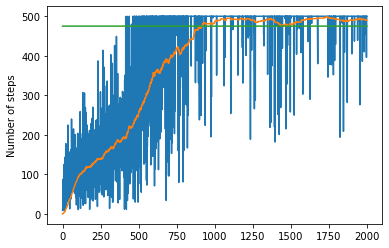

In [42]:
env = gym.make('CartPole-v1')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

  0%|          | 3/2000 [00:08<3:19:51,  6.00s/it, last_100_avg_pole_upright=-500, len(history)=61]

{'Episode 0. Iteration with pole upright: -500.0. History length: 8'}


 20%|██        | 403/2000 [00:45<24:58,  1.07it/s, last_100_avg_pole_upright=-500, len(history)=506]

{'Episode 400. Iteration with pole upright: -500.0. History length: 506'}


 40%|████      | 803/2000 [01:22<18:43,  1.07it/s, last_100_avg_pole_upright=-500, len(history)=615]

{'Episode 800. Iteration with pole upright: -500.0. History length: 615'}


 60%|██████    | 1203/2000 [02:00<12:27,  1.07it/s, last_100_avg_pole_upright=-500, len(history)=690]

{'Episode 1200. Iteration with pole upright: -500.0. History length: 690'}


 80%|████████  | 1603/2000 [02:37<06:12,  1.06it/s, last_100_avg_pole_upright=-500, len(history)=691]

{'Episode 1600. Iteration with pole upright: -500.0. History length: 691'}


100%|██████████| 2000/2000 [03:05<00:00, 10.76it/s, last_100_avg_pole_upright=-500, len(history)=697]


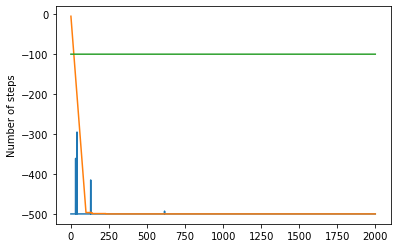

In [38]:
env = gym.make('Acrobot-v1')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

  0%|          | 6/2000 [00:03<1:22:41,  2.49s/it, last_100_avg_pole_upright=-1.33e+3, len(history)=48]

{'Episode 0. Iteration with pole upright: -1649.2991973208664. History length: 14'}


 20%|██        | 406/2000 [00:15<04:16,  6.22it/s, last_100_avg_pole_upright=-876, len(history)=66]    

{'Episode 400. Iteration with pole upright: -960.6799447420391. History length: 66'}


 40%|████      | 805/2000 [00:28<04:23,  4.54it/s, last_100_avg_pole_upright=-668, len(history)=66]

{'Episode 800. Iteration with pole upright: -508.8529861674519. History length: 66'}


 60%|██████    | 1210/2000 [00:40<02:06,  6.24it/s, last_100_avg_pole_upright=-600, len(history)=66]

{'Episode 1200. Iteration with pole upright: -255.61937540816274. History length: 66'}


 80%|████████  | 1609/2000 [00:53<01:03,  6.21it/s, last_100_avg_pole_upright=-601, len(history)=66]

{'Episode 1600. Iteration with pole upright: -866.698073578622. History length: 66'}


100%|██████████| 2000/2000 [01:01<00:00, 32.30it/s, last_100_avg_pole_upright=-570, len(history)=66]


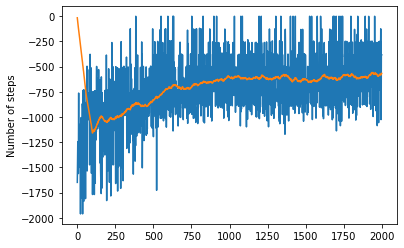

In [39]:
env = gym.make('Pendulum-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

  1%|          | 12/2000 [00:03<1:22:11,  2.48s/it, last_100_avg_pole_upright=-200, len(history)=5]

{'Episode 0. Iteration with pole upright: -200.0. History length: 2'}


 21%|██        | 414/2000 [00:10<01:46, 14.94it/s, last_100_avg_pole_upright=-200, len(history)=5] 

{'Episode 400. Iteration with pole upright: -200.0. History length: 5'}


 41%|████      | 815/2000 [00:17<01:19, 14.87it/s, last_100_avg_pole_upright=-200, len(history)=5] 

{'Episode 800. Iteration with pole upright: -200.0. History length: 5'}


 61%|██████    | 1221/2000 [00:24<00:52, 14.86it/s, last_100_avg_pole_upright=-200, len(history)=5] 

{'Episode 1200. Iteration with pole upright: -200.0. History length: 5'}


 81%|████████  | 1622/2000 [00:31<00:25, 15.04it/s, last_100_avg_pole_upright=-200, len(history)=5] 

{'Episode 1600. Iteration with pole upright: -200.0. History length: 5'}


100%|██████████| 2000/2000 [00:34<00:00, 57.42it/s, last_100_avg_pole_upright=-200, len(history)=5] 


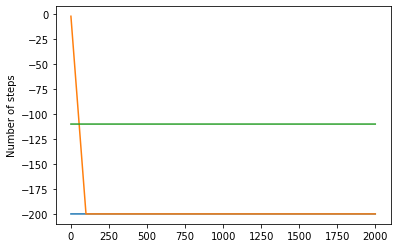

In [40]:
env = gym.make('MountainCar-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()

  0%|          | 3/2000 [00:17<6:33:52, 11.83s/it, last_100_avg_pole_upright=-50.6, len(history)=2]

{'Episode 0. Iteration with pole upright: -99.8999999999986. History length: 2'}


 20%|██        | 409/2000 [00:29<04:37,  5.74it/s, last_100_avg_pole_upright=94.9, len(history)=6]  

{'Episode 400. Iteration with pole upright: 93.23580215492368. History length: 6'}


 40%|████      | 809/2000 [00:39<02:26,  8.13it/s, last_100_avg_pole_upright=96.2, len(history)=6]

{'Episode 800. Iteration with pole upright: 95.99259229810147. History length: 6'}


 60%|██████    | 1209/2000 [00:47<01:02, 12.73it/s, last_100_avg_pole_upright=96.9, len(history)=6]

{'Episode 1200. Iteration with pole upright: 97.17037018846581. History length: 6'}


 80%|████████  | 1610/2000 [00:55<00:35, 11.08it/s, last_100_avg_pole_upright=96.9, len(history)=6]

{'Episode 1600. Iteration with pole upright: 96.6580244142332. History length: 6'}


100%|██████████| 2000/2000 [01:00<00:00, 33.29it/s, last_100_avg_pole_upright=96.9, len(history)=6]


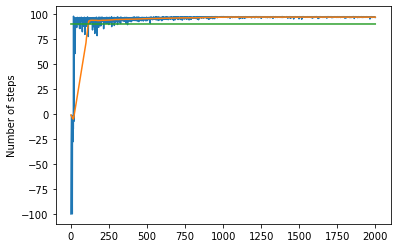

In [41]:
env = gym.make('MountainCarContinuous-v0')
nbEpisodes = 2000
nVerboseEpisodes = 400
rewardHistory = [0]*nbEpisodes

history = {}  # 'state' ==> [{'count': int, 'value': float}]

learn(nbEpisodes, nVerboseEpisodes)

env.close()
plt.plot(range(nbEpisodes), rewardHistory, 
         range(nbEpisodes), (np.convolve(rewardHistory, np.ones(100), 'full') / 100)[:nbEpisodes], 
         range(nbEpisodes), [env.spec.reward_threshold]*nbEpisodes)
plt.ylabel('Number of steps')
plt.show()